### Dataframe de ejemplo para la gráfica de barras apiladas horizontales

In [2]:
from pathlib import Path
import pandas as pd

# Ruta relativa para el archivo Excel
input_dir = Path("input")
archivo_excel = input_dir / "HDs2025 (07-04-2025).xlsx"

xls = pd.ExcelFile(archivo_excel)
df = xls.parse("PLANTILLA")

# Ajustar encabezados
df.columns = df.iloc[0]
df = df[1:]

df.columns = df.columns.str.strip().str.upper()

data = df.groupby('ENTIDAD FEDERATIVA')[['HOMBRE', 'MUJER', 'NO ESPECIFICADO']].sum()
data = data.fillna(0)
data.columns = ['Hombre', 'Mujer', 'No identificado']

df.columns = df.columns.str.strip().str.upper()

data_vertical = df.groupby('ENTIDAD FEDERATIVA')[['HOMBRE', 'MUJER', 'NO ESPECIFICADO']].sum()
data_vertical = data.fillna(0)
#data_vertical.columns = ['Hombre', 'Mujer', 'No identificado']
# Renombrar columnas específicas
data_vertical = data_vertical.rename(columns={
    'HOMBRE': 'Hombre',
    'MUJER': 'Mujer',
    'NO ESPECIFICADO': 'No identificado'
})
data_vertical

/tmp/ipykernel_120396/3818089413.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


,Hombre,Mujer,No identificado
ENTIDAD FEDERATIVA,,,
AGUASCALIENTES,23,0,0
BAJA CALIFORNIA,373,44,15
BAJA CALIFORNIA SUR,9,3,0
CAMPECHE,24,0,0
CHIAPAS,99,14,1
CHIHUAHUA,331,32,22
CIUDAD DE MEXICO,197,25,2
COAHUILA DE ZARAGOZA,17,4,0
COLIMA,95,10,6


### **Código a copiar para gráfica de barras de barras apiladas horizontales:**

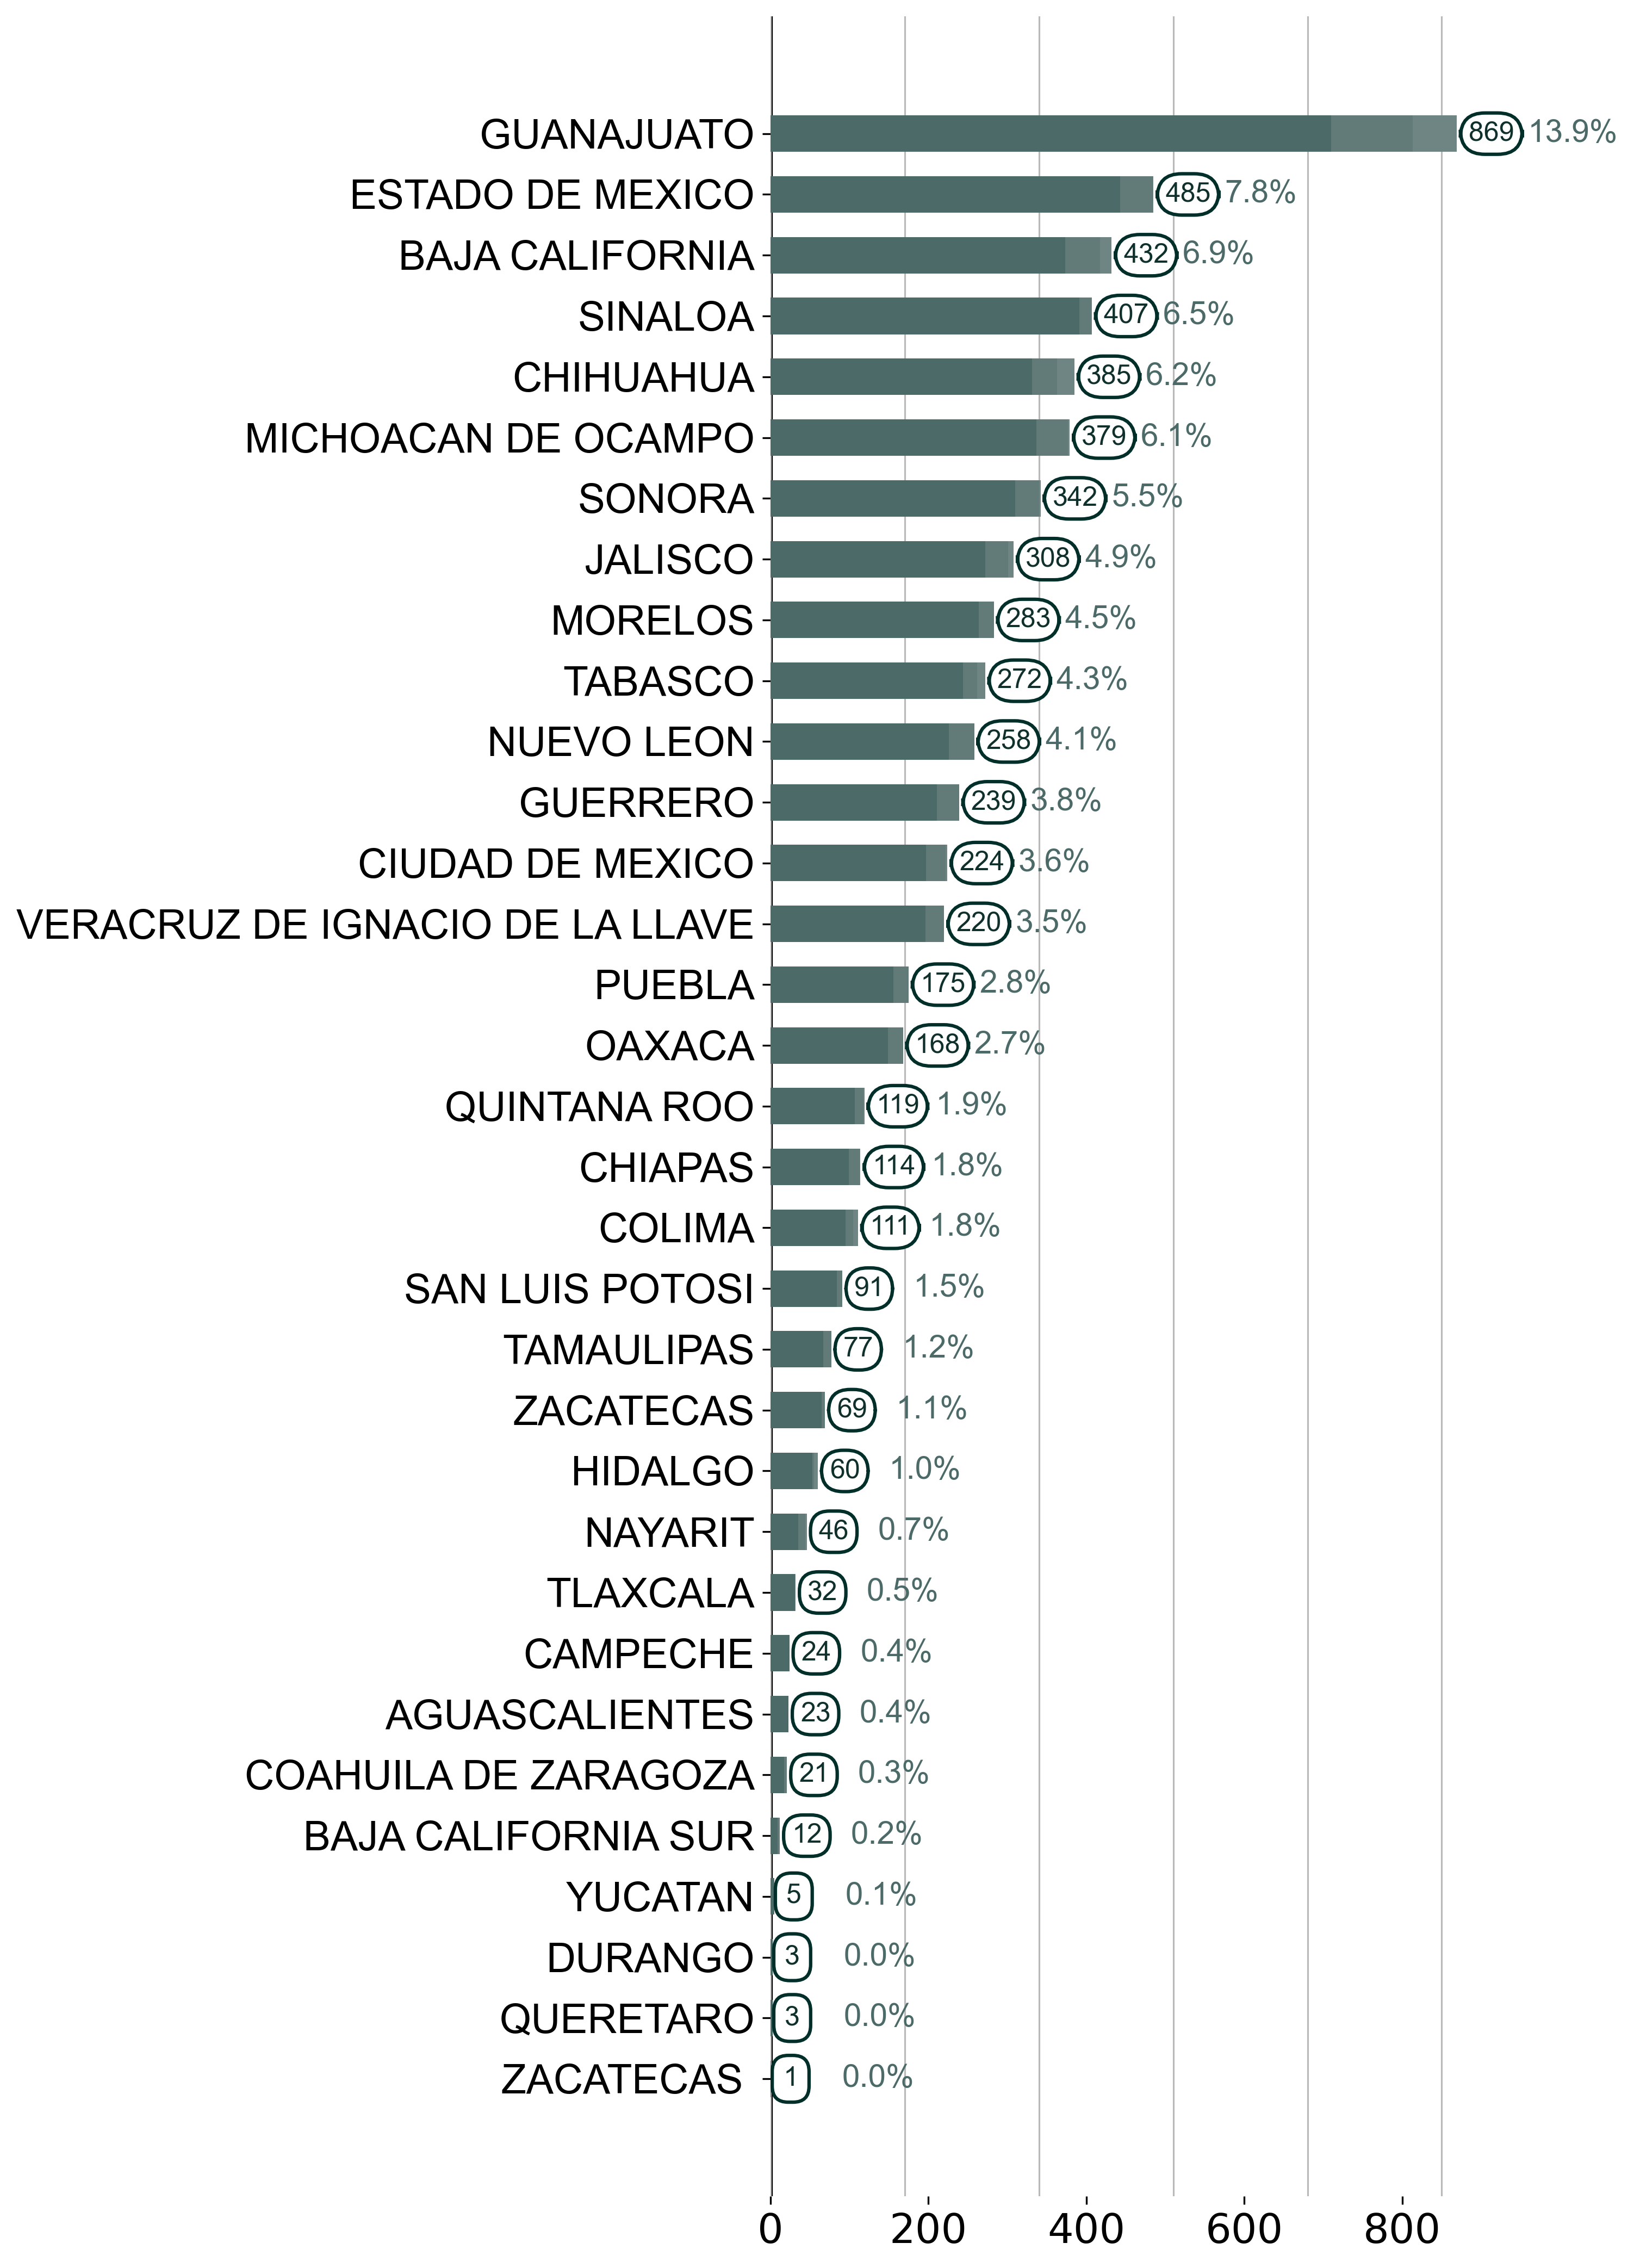

In [15]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# VARIABLES A CAMBIAR:
dataframe_a_graficar = data

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def calcular_intervalo(max_valor):
    """Calcula un intervalo adecuado para el eje Y basado en el valor máximo"""
    potencia = 10 ** (int(np.log10(max_valor)) - 1)
    intervalo = round(max_valor / 5 / potencia) * potencia

    # Asegurar que el intervalo no sea muy pequeño o grande
    if max_valor / intervalo > 8:
        intervalo *= 2
    elif max_valor / intervalo < 4:
        intervalo /= 2

    return max(intervalo, 1)  # Mínimo intervalo de 1

def barras_apiladas_horizontales(data_vertical, bar_width=0.6):
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 12, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 32, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 14, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    categorias = ['Hombre', 'Mujer', 'No identificado']
    data['Total'] = data[categorias].sum(axis=1)
    sorted_data = data.sort_values(by='Total', ascending=False)
    entidades = sorted_data.index.tolist()

    max_valor = sorted_data['Total'].max()
    total = sorted_data['Total'].sum()
    x_max = max_valor * 1.15
    x_interval = calcular_intervalo(max_valor)

    fig, ax = plt.subplots(figsize=(10, 14), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_ticks = np.arange(0, x_max + x_interval, x_interval)
    for x in x_ticks:
        lw = 2 if x == max_valor else 0.75
        lc = 'black' if x == max_valor else '#B9B9B9'
        ax.axvline(x, color=lc, linewidth=lw)

    ax.axvline(0, color='black', linewidth=2, zorder=1)

    offset_capsula = x_max * 0.015
    offset_porcentaje = x_max * 0.09
    bar_positions = np.arange(len(entidades))

    colores = {
        'Hombre': '#4C6A67',
        'Mujer': '#627B78',
        'No identificado': '#6F8583'
    }
    categorias = list(colores.keys())

    for i, entidad in enumerate(entidades):
        row = sorted_data.loc[entidad]
        y_pos = bar_positions[i]
        x_left = 0

        for cat in categorias:
            valor = row[cat]
            ax.barh(y_pos, valor, height=bar_width, left=x_left,
                    color=colores[cat], edgecolor='none', zorder=2)
            x_left += valor

        total_valor = row['Total']
        porcentaje = round((total_valor / total) * 100, 1)

        texto_kwargs = dict(
            ha='left',
            va='center',
            fontsize=font_config['capsula_valor']['size'],
            fontfamily=font_config['family'],
            fontweight=font_config['capsula_valor']['weight'],
            color=font_config['capsula_valor']['color']
        )

        if total_valor <= 5:
            boxstyle = "round,pad=0.4,rounding_size=0.59"
        elif total_valor <= 50:
            boxstyle = "round,pad=0.3,rounding_size=0.7"
        elif total_valor <= 100:
            boxstyle = "round,pad=0.3,rounding_size=0.79"
        else:
            boxstyle = "round,pad=0.3,rounding_size=0.9"

        bbox_props = dict(
            boxstyle=boxstyle,
            facecolor='white',
            edgecolor='#002F2A',
            linewidth=1.5
        )

        ax.text(
            total_valor + offset_capsula, y_pos, f"{int(total_valor):,}",
            bbox=bbox_props,
            **texto_kwargs
        )

        ax.text(
            total_valor + offset_porcentaje, y_pos, f"{porcentaje}%",
            color=font_config['porcentaje']['color'],
            fontsize=font_config['porcentaje']['size'],
            fontfamily=font_config['family'],
            fontweight=font_config['porcentaje']['weight'],
            ha='left',
            va='center'
        )

    ax.set_yticks(bar_positions)
    ax.set_yticklabels(
        entidades,
        fontsize=font_config['eje_y']['size'],
        fontfamily=font_config['family'],
        fontweight=font_config['eje_y']['weight']
    )

    ax.set_xlim(0, x_max)
    ax.invert_yaxis()

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(
        axis='x',
        labelsize=font_config['eje_x']['size'],  # Tamaño de la fuente
        labelcolor=font_config['eje_x']['color']  # Color de la fuente
    )
    ax.grid(False)

    plt.tight_layout()

    # Guardar la gráfica como archivo SVG
    plt.savefig("barras_apiladas_horizontales.svg", format="svg", bbox_inches='tight')
    plt.show()

barras_apiladas_horizontales(dataframe_a_graficar)